# Incidence du syndrome de la varicelle

In [41]:
# Activer l'affichage des graphiques dans le notebook (jupyter) en ligne.
%matplotlib inline

# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt  # Pour la création de graphiques
import pandas as pd  # Pour la manipulation des données
import isoweek  # Pour gérer les semaines ISO

In [42]:
# URL où les données d'incidence du syndrome grippal sont téléchargées
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv?v=64ay2"

Pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [43]:
# Nom du fichier local où les données seront stockées
data_file = "syndrome-varicelle.csv"

# Vérifier si le fichier local existe, et s'il n'existe pas, le télécharger depuis l'URL
import os
import urllib.request

# Vérifier si le fichier local n'existe pas
if not os.path.exists(data_file):
    # Télécharger les données depuis l'URL et les enregistrer dans le fichier local
    urllib.request.urlretrieve(data_url, data_file)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json) :

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [44]:
# Lire les données depuis le fichier local CSV en sautant la première ligne (commentaire)
raw_data = pd.read_csv(data_file, skiprows=1)

# Afficher les données brutes
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202339          7   1390      118    2662       2           0   
1     202338          7   1670      278    3062       3           1   
2     202337          7   1122      223    2021       2           1   
3     202336          7    726       10    1442       1           0   
4     202335          7    961       96    1826       1           0   
5     202334          7   1168        9    2327       2           0   
6     202333          7   3308     1184    5432       5           2   
7     202332          7   7996     1120   14872      12           2   
8     202331          7   3318     1398    5238       5           2   
9     202330          7   5821     3269    8373       9           5   
10    202329          7  13558     8297   18819      20          12   
11    202328          7   6700     4043    9357      10           6   
12    202327          7   7253     4599    9907      11           7   
13    202326          7   9192     6223   12161      14          10   
14    202325          7  11498     8257   14739      17          12   
15    202324          7  11115     7968   14262      17          12   
16    202323          7  12563     6134   18992      19           9   
17    202322          7  12184     8125   16243      18          12   
18    202321          7  11349     7598   15100      17          11   
19    202320          7   9000     4615   13385      14           7   
20    202319          7   9344     6091   12597      14           9   
21    202318          7  10671     7291   14051      16          11   
22    202317          7   9184     6162   12206      14           9   
23    202316          7  11387     8014   14760      17          12   
24    202315          7  14040     7613   20467      21          11   
25    202314          7  15247    11032   19462      23          17   
26    202313          7  13322     9700   16944      20          15   
27    202312          7  10374     7218   13530      16          11   
28    202311          7   4919     2880    6958       7           4   
29    202310          7   4854     2731    6977       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1683  199126          7  17608    11304   23912      31          20   
1684  199125          7  16169    10700   21638      28          18   
1685  199124          7  16171    10071   22271      28          17   
1686  199123          7  11947     7671   16223      21          13   
1687  199122          7  15452     9953   20951      27          17   
1688  199121          7  14903     8975   20831      26          16   
1689  199120          7  19053    12742   25364      34          23   
1690  199119          7  16739    11246   22232      29          19   
1691  199118          7  21385    13882   28888      38          25   
1692  199117          7  13462     8877   18047      24          16   
1693  199116          7  14857    10068   19646      26          18   
1694  199115          7  13975     9781   18169      25          18   
1695  199114          7  12265     7684   16846      22          14   
1696  199113          7   9567     6041   13093      17          11   
1697  199112          7  10864     7331   14397      19          13   
1698  199111          7  15574    11184   19964      27          19   
1699  199110          7  16643    11372   21914      29          20   
1700  199109          7  13741     8780   18702      24          15   
1701  199108          7  13289     8813   17765      23          15   
1702  199107          7  12337     8077   16597      22          15   
1703  199106          7  10877     7013   14741      19          12   
1704  199105          7  10442     6544   14340      18          11   
1705  199104          7   7913     4563   11263      14           8   
1706  199103          7  15387    10484   20290      27          18   
1707  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [45]:
# Sélectionner les lignes contenant au moins une valeur manquante (NaN)
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [46]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) à partir des données brutes
data = raw_data.dropna().copy()

# Afficher les données nettoyées (sans valeurs manquantes) et en créer une copie
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202339          7   1390      118    2662       2           0   
1     202338          7   1670      278    3062       3           1   
2     202337          7   1122      223    2021       2           1   
3     202336          7    726       10    1442       1           0   
4     202335          7    961       96    1826       1           0   
5     202334          7   1168        9    2327       2           0   
6     202333          7   3308     1184    5432       5           2   
7     202332          7   7996     1120   14872      12           2   
8     202331          7   3318     1398    5238       5           2   
9     202330          7   5821     3269    8373       9           5   
10    202329          7  13558     8297   18819      20          12   
11    202328          7   6700     4043    9357      10           6   
12    202327          7   7253     4599    9907      11           7   
13    202326          7   9192     6223   12161      14          10   
14    202325          7  11498     8257   14739      17          12   
15    202324          7  11115     7968   14262      17          12   
16    202323          7  12563     6134   18992      19           9   
17    202322          7  12184     8125   16243      18          12   
18    202321          7  11349     7598   15100      17          11   
19    202320          7   9000     4615   13385      14           7   
20    202319          7   9344     6091   12597      14           9   
21    202318          7  10671     7291   14051      16          11   
22    202317          7   9184     6162   12206      14           9   
23    202316          7  11387     8014   14760      17          12   
24    202315          7  14040     7613   20467      21          11   
25    202314          7  15247    11032   19462      23          17   
26    202313          7  13322     9700   16944      20          15   
27    202312          7  10374     7218   13530      16          11   
28    202311          7   4919     2880    6958       7           4   
29    202310          7   4854     2731    6977       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1683  199126          7  17608    11304   23912      31          20   
1684  199125          7  16169    10700   21638      28          18   
1685  199124          7  16171    10071   22271      28          17   
1686  199123          7  11947     7671   16223      21          13   
1687  199122          7  15452     9953   20951      27          17   
1688  199121          7  14903     8975   20831      26          16   
1689  199120          7  19053    12742   25364      34          23   
1690  199119          7  16739    11246   22232      29          19   
1691  199118          7  21385    13882   28888      38          25   
1692  199117          7  13462     8877   18047      24          16   
1693  199116          7  14857    10068   19646      26          18   
1694  199115          7  13975     9781   18169      25          18   
1695  199114          7  12265     7684   16846      22          14   
1696  199113          7   9567     6041   13093      17          11   
1697  199112          7  10864     7331   14397      19          13   
1698  199111          7  15574    11184   19964      27          19   
1699  199110          7  16643    11372   21914      29          20   
1700  199109          7  13741     8780   18702      24          15   
1701  199108          7  13289     8813   17765      23          15   
1702  199107          7  12337     8077   16597      22          15   
1703  199106          7  10877     7013   14741      19          12   
1704  199105          7  10442     6544   14340      18          11   
1705  199104          7   7913     4563   11263      14           8   
1706  199103          7  15387    10484   20290      27          18   
1707  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [47]:
# Définition d'une fonction pour convertir l'année et la semaine en période
def convert_week(year_and_week_int):
    # Convertir l'entier en une chaîne de caractères
    year_and_week_str = str(year_and_week_int)
    
    # Extraire l'année (les 4 premiers caractères de la chaîne)
    year = int(year_and_week_str[:4])
    
    # Extraire le numéro de semaine (le reste de la chaîne)
    week = int(year_and_week_str[4:])
    
    # Créer un objet isoweek.Week avec l'année et la semaine
    w = isoweek.Week(year, week)
    
    # Convertir l'objet isoweek.Week en une période pandas
    return pd.Period(w.day(0), 'W')

# Appliquer la fonction convert_week à la colonne 'week' et créer une nouvelle colonne 'period'
data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [48]:
# Définir la colonne 'period' comme index du DataFrame et trier le DataFrame par cet index
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [49]:
# Obtenir l'index (colonne 'period') du DataFrame trié
periods = sorted_data.index

# Parcourir les périodes consécutives et vérifier la différence temporelle entre elles
for p1, p2 in zip(periods[:-1], periods[1:]):
    # Calculer la différence temporelle entre la fin de la période p1 et le début de la période p2
    delta = p2.to_timestamp() - p1.end_time
    
    # Vérifier si la différence temporelle est supérieure à 1 seconde
    if delta > pd.Timedelta('1s'):
        # Afficher les paires de périodes consécutives qui ont une différence temporelle inattendue
        print(p1, p2)

Un premier regard sur les données !

In [50]:
# Convertir la colonne 'inc' en type numérique (float)
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='coerce')
print(sorted_data['inc'].dtypes)

int64


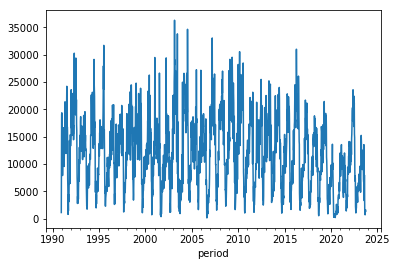

In [51]:
# Tracer un graphique de la colonne 'inc' du DataFrame trié
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

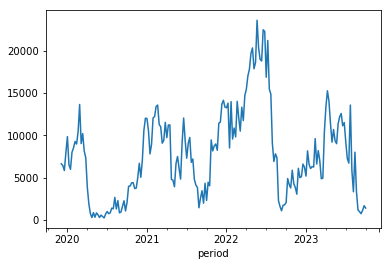

In [52]:
# Tracer un graphique des 200 dernières entrées de la colonne 'inc' du DataFrame trié
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [53]:
# Créer une liste des premières semaines d'août pour chaque année entre 1985 et la dernière année de l'index de sorted_data
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [55]:
# Initialisation des listes pour stocker les données annuelles
year = []  # Liste des années
yearly_incidence = []  # Liste des incidences annuelles

# Parcourir les paires d'intervalles annuels définies par first_august_week
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    # Extraire les données d'incidence pour une année donnée
    one_year = sorted_data['inc'][week1:week2-1]
    
    # Vérifier que chaque année a environ 52 semaines d'incidence
    #assert abs(len(one_year) - 52) < 2
    
    # Ajouter la somme des incidences de l'année à la liste yearly_incidence
    yearly_incidence.append(one_year.sum())
    
    # Ajouter l'année correspondante à la liste year
    year.append(week2.year)

# Créer une série pandas avec les données annuelles et les années comme index
yearly_incidence = pd.Series(data=yearly_incidence, index=year)


Voici les incidences annuelles.

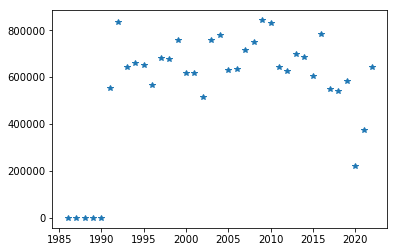

In [56]:
# Tracer un graphique de dispersion des données d'incidence annuelle avec un style en étoile
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [57]:
# Trier les données d'incidence annuelle par ordre croissant
yearly_incidence.sort_values()

1986         0
1987         0
1988         0
1989         0
1990         0
2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

In [58]:
# Supposons que yearly_incidence soit une série de données pandas
# Triez les données d'incidence annuelle par ordre croissant
yearly_incidence = yearly_incidence.sort_values()

# Trouver le minimum et le maximum
minimum = yearly_incidence.min()
maximum = yearly_incidence.max()

print("Minimum d'incidence annuelle:", minimum)
print("Maximum d'incidence annuelle:", maximum)

Minimum d'incidence annuelle: 0
Maximum d'incidence annuelle: 842373


Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

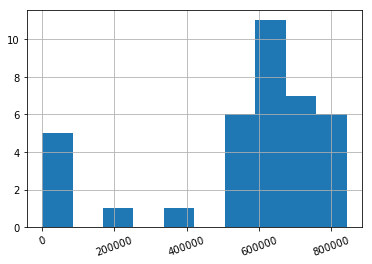

In [59]:
# Tracer un histogramme des données d'incidence annuelle avec une rotation de l'axe des x de 20 degrés
yearly_incidence.hist(xrot=20)